 # [10 Minutes to pandas](http://pandas-docs.github.io/pandas-docs-travis/getting_started/10min.html)

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


 ## Object creation

In [2]:
# creating a Series by passing a list of values, letting pandas create a default integer index
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s


0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
# creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns
dates = pd.date_range('20130101', periods=6)
dates


DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df


,A,B,C,D
2013-01-01,1.679767,-0.549914,-1.625184,0.974549
2013-01-02,0.727440,-0.016611,-0.604831,1.267557
2013-01-03,-0.545202,-0.424555,0.448616,1.163568
2013-01-04,1.125928,0.378548,-0.561419,0.374043
2013-01-05,0.452044,0.502287,1.018191,0.796812
2013-01-06,-1.349825,1.335060,0.024808,-1.030594


In [5]:
# creating a DataFrame by passing a dict of objects that can be converted to series-like
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2


,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
# the columns of the resulting DataFrame have different dtypes
df2.dtypes


A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

 ## Viewing data

In [7]:
# view the top and bottom rows of the frame
df.head()


,A,B,C,D
2013-01-01,1.679767,-0.549914,-1.625184,0.974549
2013-01-02,0.727440,-0.016611,-0.604831,1.267557
2013-01-03,-0.545202,-0.424555,0.448616,1.163568
2013-01-04,1.125928,0.378548,-0.561419,0.374043
2013-01-05,0.452044,0.502287,1.018191,0.796812


In [8]:
df.tail(3)


,A,B,C,D
2013-01-04,1.125928,0.378548,-0.561419,0.374043
2013-01-05,0.452044,0.502287,1.018191,0.796812
2013-01-06,-1.349825,1.335060,0.024808,-1.030594


In [9]:
# display the index and columns
df.index


DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns


Index(['A', 'B', 'C', 'D'], dtype='object')

 `DataFrame.to_numpy()` gives a NumPy representation of the underlying data. This can be an expensive operation when your `DataFrame` has columns with different data types because NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being `object`, which requires casting every value to a Python object.

In [11]:
# for df, our DataFrame of all floating-point values, DataFrame.to_numpy() is fast and doesn’t require copying data
df.to_numpy()


array([[ 1.67976667, -0.54991418, -1.6251842 ,  0.97454858],
       [ 0.72743963, -0.01661142, -0.60483079,  1.2675566 ],
       [-0.54520176, -0.42455473,  0.44861582,  1.16356826],
       [ 1.12592844,  0.37854763, -0.56141906,  0.3740427 ],
       [ 0.45204444,  0.50228703,  1.01819062,  0.79681193],
       [-1.34982523,  1.33506003,  0.02480783, -1.03059369]])

In [12]:
# for df2, the DataFrame with multiple dtypes, DataFrame.to_numpy() is relatively expensive
df2.to_numpy()


array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [13]:
# describe() shows a quick statistic summary of your data
df.describe()


,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.348359,0.204136,-0.216637,0.590989
std,1.114809,0.694388,0.925120,0.854596
min,-1.349825,-0.549914,-1.625184,-1.030594
25%,-0.295890,-0.322569,-0.593978,0.479735
50%,0.589742,0.180968,-0.268306,0.885680
75%,1.026306,0.471352,0.342664,1.116313
max,1.679767,1.335060,1.018191,1.267557


In [14]:
# transposing your data
df.T


,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,1.679767,0.727440,-0.545202,1.125928,0.452044,-1.349825
B,-0.549914,-0.016611,-0.424555,0.378548,0.502287,1.335060
C,-1.625184,-0.604831,0.448616,-0.561419,1.018191,0.024808
D,0.974549,1.267557,1.163568,0.374043,0.796812,-1.030594


In [15]:
# sorting by an axis
df.sort_index(axis=1, ascending=False)


,D,C,B,A
2013-01-01,0.974549,-1.625184,-0.549914,1.679767
2013-01-02,1.267557,-0.604831,-0.016611,0.727440
2013-01-03,1.163568,0.448616,-0.424555,-0.545202
2013-01-04,0.374043,-0.561419,0.378548,1.125928
2013-01-05,0.796812,1.018191,0.502287,0.452044
2013-01-06,-1.030594,0.024808,1.335060,-1.349825


In [16]:
# sorting by values
df.sort_values(by='B')


,A,B,C,D
2013-01-01,1.679767,-0.549914,-1.625184,0.974549
2013-01-03,-0.545202,-0.424555,0.448616,1.163568
2013-01-02,0.727440,-0.016611,-0.604831,1.267557
2013-01-04,1.125928,0.378548,-0.561419,0.374043
2013-01-05,0.452044,0.502287,1.018191,0.796812
2013-01-06,-1.349825,1.335060,0.024808,-1.030594


 ## Selection

 ### Getting

In [17]:
# selecting a single column, which yields a Series, equivalent to df.A
df['A']


2013-01-01    1.679767
2013-01-02    0.727440
2013-01-03   -0.545202
2013-01-04    1.125928
2013-01-05    0.452044
2013-01-06   -1.349825
Freq: D, Name: A, dtype: float64

In [18]:
# selecting via [], which slices the rows
df[0:3]


,A,B,C,D
2013-01-01,1.679767,-0.549914,-1.625184,0.974549
2013-01-02,0.727440,-0.016611,-0.604831,1.267557
2013-01-03,-0.545202,-0.424555,0.448616,1.163568


In [19]:
df['20130102':'20130104']


,A,B,C,D
2013-01-02,0.727440,-0.016611,-0.604831,1.267557
2013-01-03,-0.545202,-0.424555,0.448616,1.163568
2013-01-04,1.125928,0.378548,-0.561419,0.374043


 ### Selection by label

In [20]:
# getting a cross section using a label
df.loc[dates[0]]


A    1.679767
B   -0.549914
C   -1.625184
D    0.974549
Name: 2013-01-01 00:00:00, dtype: float64

In [21]:
# selecting on a multi-axis by label
df.loc[:, ['A', 'B']]


,A,B
2013-01-01,1.679767,-0.549914
2013-01-02,0.727440,-0.016611
2013-01-03,-0.545202,-0.424555
2013-01-04,1.125928,0.378548
2013-01-05,0.452044,0.502287
2013-01-06,-1.349825,1.335060


In [22]:
# showing label slicing, both endpoints are included
df.loc['20130102':'20130104', ['A', 'B']]


,A,B
2013-01-02,0.727440,-0.016611
2013-01-03,-0.545202,-0.424555
2013-01-04,1.125928,0.378548


In [23]:
# reduction in the dimensions of the returned object
df.loc['20130102', ['A', 'B']]


A    0.727440
B   -0.016611
Name: 2013-01-02 00:00:00, dtype: float64

In [24]:
# getting a scalar value
df.loc[dates[0], 'A']


1.6797666707230328

In [25]:
# getting fast access to a scalar (equivalent to the prior method)
df.at[dates[0], 'A']


1.6797666707230328

 ### Selection by position

In [26]:
# select via the position of the passed integers
df.iloc[3]


A    1.125928
B    0.378548
C   -0.561419
D    0.374043
Name: 2013-01-04 00:00:00, dtype: float64

In [27]:
# by integer slices, acting similar to numpy/python
df.iloc[3:5, 0:2]


,A,B
2013-01-04,1.125928,0.378548
2013-01-05,0.452044,0.502287


In [28]:
# by lists of integer position locations, similar to the numpy/python style
df.iloc[[1, 2, 4], [0, 2]]


,A,C
2013-01-02,0.727440,-0.604831
2013-01-03,-0.545202,0.448616
2013-01-05,0.452044,1.018191


In [29]:
# slicing rows explicitly
df.iloc[1:3, :]


,A,B,C,D
2013-01-02,0.727440,-0.016611,-0.604831,1.267557
2013-01-03,-0.545202,-0.424555,0.448616,1.163568


In [30]:
# slicing columns explicitly
df.iloc[:, 1:3]


,B,C
2013-01-01,-0.549914,-1.625184
2013-01-02,-0.016611,-0.604831
2013-01-03,-0.424555,0.448616
2013-01-04,0.378548,-0.561419
2013-01-05,0.502287,1.018191
2013-01-06,1.335060,0.024808


In [31]:
# getting a value explicitly
df.iloc[1, 1]


-0.01661142445483997

In [32]:
# getting fast access to a scalar (equivalent to the prior method)
df.iat[1, 1]


-0.01661142445483997

 ### Boolean indexing

In [33]:
# using a single column’s values to select data
df[df.A > 0]


,A,B,C,D
2013-01-01,1.679767,-0.549914,-1.625184,0.974549
2013-01-02,0.727440,-0.016611,-0.604831,1.267557
2013-01-04,1.125928,0.378548,-0.561419,0.374043
2013-01-05,0.452044,0.502287,1.018191,0.796812


In [34]:
# selecting values from a DataFrame where a boolean condition is met
df[df > 0]


,A,B,C,D
2013-01-01,1.679767,NaN,NaN,0.974549
2013-01-02,0.727440,NaN,NaN,1.267557
2013-01-03,NaN,NaN,0.448616,1.163568
2013-01-04,1.125928,0.378548,NaN,0.374043
2013-01-05,0.452044,0.502287,1.018191,0.796812
2013-01-06,NaN,1.335060,0.024808,NaN


In [35]:
# using the isin() method for filtering
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2


,A,B,C,D,E
2013-01-01,1.679767,-0.549914,-1.625184,0.974549,one
2013-01-02,0.727440,-0.016611,-0.604831,1.267557,one
2013-01-03,-0.545202,-0.424555,0.448616,1.163568,two
2013-01-04,1.125928,0.378548,-0.561419,0.374043,three
2013-01-05,0.452044,0.502287,1.018191,0.796812,four
2013-01-06,-1.349825,1.335060,0.024808,-1.030594,three


In [36]:
df2[df2['E'].isin(['two', 'four'])]


,A,B,C,D,E
2013-01-03,-0.545202,-0.424555,0.448616,1.163568,two
2013-01-05,0.452044,0.502287,1.018191,0.796812,four


 ### Setting

In [37]:
# setting a new column automatically aligns the data by the indexes
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130102', periods=6))
s1


2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [38]:
df['F'] = s1


In [39]:
# setting values by label
df.at[dates[0], 'A'] = 0


In [40]:
# setting values by position
df.iat[0, 1] = 0


In [41]:
# setting by assigning with a NumPy array
df.loc[:, 'D'] = np.array([5] * len(df))


In [42]:
# result of the prior setting operations
df


,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.625184,5,NaN
2013-01-02,0.727440,-0.016611,-0.604831,5,1.0
2013-01-03,-0.545202,-0.424555,0.448616,5,2.0
2013-01-04,1.125928,0.378548,-0.561419,5,3.0
2013-01-05,0.452044,0.502287,1.018191,5,4.0
2013-01-06,-1.349825,1.335060,0.024808,5,5.0


In [43]:
# a where operation with setting
df2 = df.copy()
df2[df2 > 0] = -df2
df2


,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.625184,-5,NaN
2013-01-02,-0.727440,-0.016611,-0.604831,-5,-1.0
2013-01-03,-0.545202,-0.424555,-0.448616,-5,-2.0
2013-01-04,-1.125928,-0.378548,-0.561419,-5,-3.0
2013-01-05,-0.452044,-0.502287,-1.018191,-5,-4.0
2013-01-06,-1.349825,-1.335060,-0.024808,-5,-5.0


 ## Missing data

 pandas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations.

In [44]:
# reindexing to change/add/delete the index on a specific axis
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1


,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.625184,5,NaN,1.0
2013-01-02,0.727440,-0.016611,-0.604831,5,1.0,1.0
2013-01-03,-0.545202,-0.424555,0.448616,5,2.0,NaN
2013-01-04,1.125928,0.378548,-0.561419,5,3.0,NaN


In [45]:
# to drop any rows that have missing data
df1.dropna(how='any')


,A,B,C,D,F,E
2013-01-02,0.72744,-0.016611,-0.604831,5,1.0,1.0


In [46]:
# filling missing data
df1.fillna(value=5)


,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-1.625184,5,5.0,1.0
2013-01-02,0.727440,-0.016611,-0.604831,5,1.0,1.0
2013-01-03,-0.545202,-0.424555,0.448616,5,2.0,5.0
2013-01-04,1.125928,0.378548,-0.561419,5,3.0,5.0


In [47]:
# get the boolean mask where values are nan
pd.isna(df1)


,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


 ## Operations

 ### Stats

 Operations in general exclude missing data.

In [48]:
# performing a descriptive statistic
df.mean()


A    0.068398
B    0.295788
C   -0.216637
D    5.000000
F    3.000000
dtype: float64

In [49]:
# same operation on the other axis
df.mean(1)


2013-01-01    0.843704
2013-01-02    1.221199
2013-01-03    1.295772
2013-01-04    1.788611
2013-01-05    2.194504
2013-01-06    2.002009
Freq: D, dtype: float64

In [50]:
# operating with objects that have different dimensionality and need alignment
# pandas automatically broadcasts along the specified dimension
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s


2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [51]:
df.sub(s, axis='index')


,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.545202,-1.424555,-0.551384,4.0,1.0
2013-01-04,-1.874072,-2.621452,-3.561419,2.0,0.0
2013-01-05,-4.547956,-4.497713,-3.981809,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


 ### Apply

In [52]:
# applying functions to the data
df.apply(np.cumsum)


,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.625184,5,NaN
2013-01-02,0.727440,-0.016611,-2.230015,10,1.0
2013-01-03,0.182238,-0.441166,-1.781399,15,3.0
2013-01-04,1.308166,-0.062619,-2.342818,20,6.0
2013-01-05,1.760211,0.439669,-1.324628,25,10.0
2013-01-06,0.410386,1.774729,-1.299820,30,15.0


In [53]:
df.apply(lambda x: x.max() - x.min())


A    2.475754
B    1.759615
C    2.643375
D    0.000000
F    4.000000
dtype: float64

 ### Histogramming

In [54]:
s = pd.Series(np.random.randint(0, 7, size=10))
s


0    6
1    4
2    1
3    6
4    1
5    5
6    4
7    0
8    0
9    5
dtype: int32

In [55]:
s.value_counts()


6    2
5    2
4    2
1    2
0    2
dtype: int64

 ### String methods

In [56]:
# pattern-matching in str generally uses regular expressions by default (and in some cases always uses them)
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()


0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

 ## Merge

 ### Concat

In [57]:
# concatenating pandas objects together
df = pd.DataFrame(np.random.randn(10, 4))
df


,0,1,2,3
0,0.724048,0.791201,0.509732,-0.187043
1,0.125305,0.302901,-0.994737,0.258753
2,0.789821,0.731585,-0.770195,0.479770
3,-0.406889,0.127516,1.759216,2.311199
4,0.925057,-1.813591,-1.201088,-0.081583
5,0.089615,1.655240,-0.090717,0.675074
6,-0.369226,0.171371,-0.571859,2.004687
7,-1.994290,0.281778,-3.268734,1.458493
8,-0.600569,-1.247495,0.805746,-0.360727
9,0.963844,0.201413,0.131343,0.393099


In [58]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)


,0,1,2,3
0,0.724048,0.791201,0.509732,-0.187043
1,0.125305,0.302901,-0.994737,0.258753
2,0.789821,0.731585,-0.770195,0.479770
3,-0.406889,0.127516,1.759216,2.311199
4,0.925057,-1.813591,-1.201088,-0.081583
5,0.089615,1.655240,-0.090717,0.675074
6,-0.369226,0.171371,-0.571859,2.004687
7,-1.994290,0.281778,-3.268734,1.458493
8,-0.600569,-1.247495,0.805746,-0.360727
9,0.963844,0.201413,0.131343,0.393099


 ### Join

In [59]:
# SQL-style merges
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})


In [60]:
left


,key,lval
0,foo,1
1,foo,2


In [61]:
right


,key,rval
0,foo,4
1,foo,5


In [62]:
pd.merge(left, right, on='key')


,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [63]:
# another example
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})


In [64]:
left


,key,lval
0,foo,1
1,bar,2


In [65]:
right


,key,rval
0,foo,4
1,bar,5


In [66]:
pd.merge(left, right, on='key')


,key,lval,rval
0,foo,1,4
1,bar,2,5


 ### Append

In [67]:
# append rows to a dataframe
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df


,A,B,C,D
0,-1.156701,0.200732,1.135213,-0.633578
1,-1.528755,-1.237738,0.630340,0.677212
2,-1.169316,1.440212,-0.978576,-0.610851
3,1.783833,-0.556800,0.896700,-0.455335
4,-0.391620,1.720646,-0.833301,0.746521
5,-0.408405,-0.805294,0.715423,-0.352150
6,1.071460,0.166692,0.942105,-0.504390
7,-0.403426,0.645074,-1.051438,0.091485


In [68]:
s = df.iloc[3]
df.append(s, ignore_index=True)


,A,B,C,D
0,-1.156701,0.200732,1.135213,-0.633578
1,-1.528755,-1.237738,0.630340,0.677212
2,-1.169316,1.440212,-0.978576,-0.610851
3,1.783833,-0.556800,0.896700,-0.455335
4,-0.391620,1.720646,-0.833301,0.746521
5,-0.408405,-0.805294,0.715423,-0.352150
6,1.071460,0.166692,0.942105,-0.504390
7,-0.403426,0.645074,-1.051438,0.091485
8,1.783833,-0.556800,0.896700,-0.455335


 ## Grouping

 Grouping refers to a process involving one or more of the following steps:
 * **Splitting** the data into groups based on some criteria
 * **Applying** a function to each group independently
 * **Combining** the results into a data structure

In [69]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                    'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                    'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})
df


,A,B,C,D
0,foo,one,-0.351939,-1.638301
1,bar,one,-0.842056,-0.461174
2,foo,two,-1.851977,-1.145395
3,bar,three,0.336060,-0.026154
4,foo,two,1.051567,-0.590747
5,bar,two,-0.731722,1.456470
6,foo,one,-0.728943,0.651578
7,foo,three,1.745879,0.556765


In [70]:
# grouping and then applying the sum() function to the resulting groups
df.groupby('A').sum()


,C,D
A,,
bar,-1.237718,0.969142
foo,-0.135413,-2.166101


In [71]:
# grouping by multiple columns forms a hierarchical index
df.groupby(['A', 'B']).sum()


C         D
A   B                        
bar one   -0.842056 -0.461174
    three  0.336060 -0.026154
    two   -0.731722  1.456470
foo one   -1.080882 -0.986723
    three  1.745879  0.556765
    two   -0.800410 -1.736143

 ## Reshaping

 ### Stack

In [72]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                    'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                    'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2


A         B
first second                    
bar   one    -1.190849  0.270010
      two     0.181676 -0.517891
baz   one     0.083331 -0.297691
      two     1.666334 -0.044505

In [73]:
# the stack() method "compresses" a level in the DataFrame's columns
stacked = df2.stack()
stacked


first  second   
bar    one     A   -1.190849
               B    0.270010
       two     A    0.181676
               B   -0.517891
baz    one     A    0.083331
               B   -0.297691
       two     A    1.666334
               B   -0.044505
dtype: float64

 With a "stacked" DataFrame or Series (having a `MultiIndex` as the `index`), the last inverse operation of `stack()` is `unstack()`, which by default unstacks the **last level**.

In [74]:
stacked.unstack()


A         B
first second                    
bar   one    -1.190849  0.270010
      two     0.181676 -0.517891
baz   one     0.083331 -0.297691
      two     1.666334 -0.044505

In [75]:
stacked.unstack(1)


second        one       two
first                      
bar   A -1.190849  0.181676
      B  0.270010 -0.517891
baz   A  0.083331  1.666334
      B -0.297691 -0.044505

In [76]:
stacked.unstack(0)


first          bar       baz
second                      
one    A -1.190849  0.083331
       B  0.270010 -0.297691
two    A  0.181676  1.666334
       B -0.517891 -0.044505

 ### Pivot tables

In [77]:
df = pd.DataFrame({'A': ['one', 'one', 'two', 'three'] * 3,
                    'B': ['A', 'B', 'C'] * 4,
                    'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D': np.random.randn(12),
                    'E': np.random.randn(12)})
df


,A,B,C,D,E
0,one,A,foo,-0.936263,0.543136
1,one,B,foo,0.613546,-0.319192
2,two,C,foo,-0.502231,-1.195760
3,three,A,bar,-1.852652,0.419272
4,one,B,bar,1.744452,0.750003
5,one,C,bar,1.285691,2.028560
6,two,A,foo,0.112532,0.455432
7,three,B,foo,-1.023344,-0.108600
8,one,C,foo,0.457454,0.299644
9,one,A,bar,-2.511961,0.395015


In [78]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])


C             bar       foo
A     B                    
one   A -2.511961 -0.936263
      B  1.744452  0.613546
      C  1.285691  0.457454
three A -1.852652       NaN
      B       NaN -1.023344
      C -1.860344       NaN
two   A       NaN  0.112532
      B -0.727649       NaN
      C       NaN -0.502231

 ## Time series

 pandas has the functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data).

In [79]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()


2012-01-01    25617
Freq: 5T, dtype: int32

In [80]:
# time zone representation
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts


2012-03-06    1.235637
2012-03-07   -1.559624
2012-03-08   -1.181064
2012-03-09   -1.186723
2012-03-10    0.509988
Freq: D, dtype: float64

In [81]:
ts_utc = ts.tz_localize('UTC')
ts_utc


2012-03-06 00:00:00+00:00    1.235637
2012-03-07 00:00:00+00:00   -1.559624
2012-03-08 00:00:00+00:00   -1.181064
2012-03-09 00:00:00+00:00   -1.186723
2012-03-10 00:00:00+00:00    0.509988
Freq: D, dtype: float64

In [82]:
# converting to another time zone
ts_utc.tz_convert('US/Eastern')


2012-03-05 19:00:00-05:00    1.235637
2012-03-06 19:00:00-05:00   -1.559624
2012-03-07 19:00:00-05:00   -1.181064
2012-03-08 19:00:00-05:00   -1.186723
2012-03-09 19:00:00-05:00    0.509988
Freq: D, dtype: float64

In [83]:
# converting between time span representation
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts


2012-01-31    1.514975
2012-02-29   -0.212224
2012-03-31   -1.334021
2012-04-30    0.181384
2012-05-31   -0.360611
Freq: M, dtype: float64

In [84]:
ps = ts.to_period()
ps


2012-01    1.514975
2012-02   -0.212224
2012-03   -1.334021
2012-04    0.181384
2012-05   -0.360611
Freq: M, dtype: float64

In [85]:
ps.to_timestamp()


2012-01-01    1.514975
2012-02-01   -0.212224
2012-03-01   -1.334021
2012-04-01    0.181384
2012-05-01   -0.360611
Freq: MS, dtype: float64

In [86]:
# convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()


1990-03-01 09:00   -0.402548
1990-06-01 09:00   -0.092559
1990-09-01 09:00    0.961182
1990-12-01 09:00   -1.107987
1991-03-01 09:00    1.433860
Freq: H, dtype: float64

 ## Categoricals

In [87]:
# categorical data in a DataFrame
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                    "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
# convert the raw grades to a categorical data type
df["grade"] = df["raw_grade"].astype("category")
df["grade"]


0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [88]:
# rename the categories to more meaningful names
df["grade"].cat.categories = ["very good", "good", "very bad"]
# reorder the categories and simultaneously add the missing categories 
# methods under Series.cat return a new Series by default
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium",
                                                "good", "very good"])
df["grade"]


0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [89]:
# sorting is per order in the categories, not lexical order
df.sort_values(by="grade")


,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [90]:
# grouping by a categorical column also shows empty categories
df.groupby("grade").size()


grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

 ## Plotting

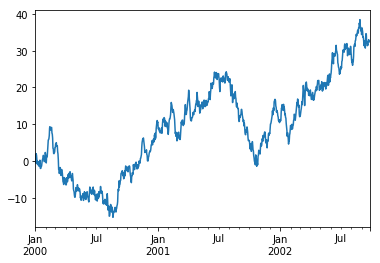

In [91]:
ts = pd.Series(np.random.randn(1000),
                index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()


<Figure size 432x288 with 0 Axes>

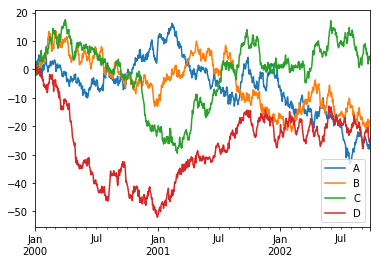

In [92]:
# on a DataFrame, the plot() method is a convenience to plot all of the columns with labels
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                    columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')


 ## Getting data in / out

 ### CSV

In [93]:
# writing to a csv file
df.to_csv('foo.csv')
# reading from a csv file
pd.read_csv('foo.csv')


,Unnamed: 0,A,B,C,D
0,2000-01-01,0.507871,0.905254,0.104469,-0.208736
1,2000-01-02,1.246623,0.163474,0.939242,-0.107171
2,2000-01-03,1.785736,-0.320454,-1.793489,-0.500832
3,2000-01-04,2.042514,-0.539786,-2.036639,1.485495
4,2000-01-05,2.768414,-0.074763,-2.073993,0.554179
5,2000-01-06,1.747225,0.874827,-1.816076,0.768441
6,2000-01-07,1.797343,1.042632,-0.461137,-0.493943
7,2000-01-08,1.768039,1.294522,0.156925,-1.684184
8,2000-01-09,3.397030,1.255424,-1.236918,-1.262289
9,2000-01-10,3.391308,-0.028830,0.677314,-1.468792


 ### HDF5

In [94]:
# writing to a HDF5 Store
df.to_hdf('foo.h5', 'df')
# reading from a HDF5 Store
pd.read_hdf('foo.h5', 'df')


,A,B,C,D
2000-01-01,0.507871,0.905254,0.104469,-0.208736
2000-01-02,1.246623,0.163474,0.939242,-0.107171
2000-01-03,1.785736,-0.320454,-1.793489,-0.500832
2000-01-04,2.042514,-0.539786,-2.036639,1.485495
2000-01-05,2.768414,-0.074763,-2.073993,0.554179
2000-01-06,1.747225,0.874827,-1.816076,0.768441
2000-01-07,1.797343,1.042632,-0.461137,-0.493943
2000-01-08,1.768039,1.294522,0.156925,-1.684184
2000-01-09,3.397030,1.255424,-1.236918,-1.262289
2000-01-10,3.391308,-0.028830,0.677314,-1.468792


 ### Excel

In [95]:
# writing to an excel file
df.to_excel('foo.xlsx', sheet_name='Sheet1')
# reading from an excel file
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])


,Unnamed: 0,A,B,C,D
0,2000-01-01,0.507871,0.905254,0.104469,-0.208736
1,2000-01-02,1.246623,0.163474,0.939242,-0.107171
2,2000-01-03,1.785736,-0.320454,-1.793489,-0.500832
3,2000-01-04,2.042514,-0.539786,-2.036639,1.485495
4,2000-01-05,2.768414,-0.074763,-2.073993,0.554179
5,2000-01-06,1.747225,0.874827,-1.816076,0.768441
6,2000-01-07,1.797343,1.042632,-0.461137,-0.493943
7,2000-01-08,1.768039,1.294522,0.156925,-1.684184
8,2000-01-09,3.397030,1.255424,-1.236918,-1.262289
9,2000-01-10,3.391308,-0.028830,0.677314,-1.468792


 ## Gotchas
 If you are attempting to perform an operation you might see an exception like:
 ```
 >>> if pd.Series([False, True, False]):
 ...     print("I was true")
 Traceback
    ...
 ValueError: The truth value of an array is ambiguous. Use a.empty, a.any() or a.all().
 ```